<a href="https://colab.research.google.com/github/juanganb1/IA/blob/main/IA_16_04_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

X_train = np.divide(x_train, 255.0)
X_test  = np.divide(x_test, 255.0)

print (X_train [0])
print (y_train [0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.   

In [9]:
def oneHotEncode(labels):
  encoded = np.zeros((labels.shape[0], 10))
  for i, l in enumerate (labels):
    encoded [i, l] = 1.0

  return encoded

encoded_y_train = oneHotEncode(y_train)
encoded_y_test = oneHotEncode(y_test)

print(encoded_y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size=(3,3), strides=(1,1), padding= 'same', input_shape=(28,28,1), activation='relu')) #input_shape el uno es xq es en escala de gris

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=8, kernel_size=(3,3),  strides=(1,1), padding= 'same', activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=8, kernel_size=(3,3),  strides=(1,1), padding= 'same', activation='relu'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 8)          

In [11]:
X_train = X_train.reshape(60000,28,28,1)
X_test  = X_test.reshape(10000,28,28,1)

model.fit(X_train, encoded_y_train, epochs=10, batch_size=32, validation_data=(x_test, encoded_y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3816 - accuracy: 0.8814 - val_loss: 18.0484 - val_accuracy: 0.9581
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1304 - accuracy: 0.9605 - val_loss: 12.3766 - val_accuracy: 0.9711
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0991 - accuracy: 0.9703 - val_loss: 12.0430 - val_accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0831 - accuracy: 0.9746 - val_loss: 10.4340 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0732 - accuracy: 0.9772 - val_loss: 8.5760 - val_accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0674 - accuracy: 0.9793 - val_loss: 8.4155 - val_accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 9.4117 - val_acc

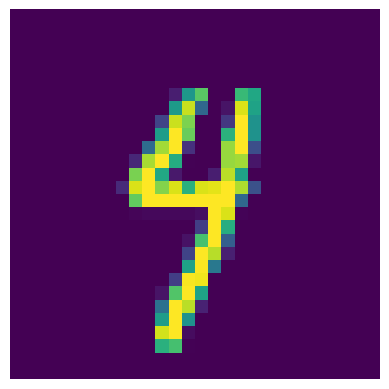

1/1 [==============================] - 0s 50ms/step
4
4


In [34]:
img = x_test[4567]
label = y_test [4567]

img = img.reshape(28,28)

plt.imshow(img)
plt.axis('off')
plt.show()

out = model.predict(img.reshape(1,28,28,1))

print(label)
print(np.argmax(out))